# はじめての Bayes推論実習

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
import pymc as pm
import arviz as az

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## 問題
常に確率が一定で、前回の結果が次回に一切影響しないくじ引きがあります。ある人がくじ引きを５回引いたところ、結果は
**「当たり、はずれ、はずれ、当たり、はずれ」**
でした。
１回のくじ引きに当たる確率を $p$ とするとき、この $p$ の値を求めなさい。

### 最尤推定
尤度関数の値が最大になる Parameter $p$ の値を求める手法
#### 尤度関数
$$
f(p) = p^2(1-p)^3
$$

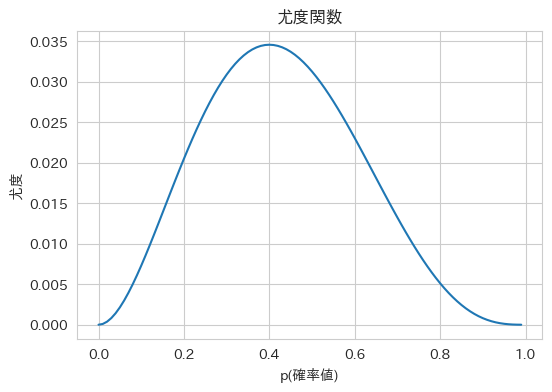

In [2]:
# 尤度関数の Graph
def likelihood(p):
    return p ** 2 * (1 - p) ** 3

# Graph 描画用 x 座標の定義
# 0.0 < x < 1.0
p = np.arange(0.0, 1.0, 0.01)

# Graph描画
plt.rcParams['figure.figsize'] = (6, 4)
plt.plot(p, likelihood(p))
plt.xlabel('p(確率値)')
plt.ylabel('尤度')
plt.title('尤度関数')
plt.show()

In [4]:
# PyTorch を install
# !pipenv install torch

Installing torch...
⠇ ✔ Installation Succeededtorch to Pipfile's ...
Pipfile.lock (2318f2) out of date, updating to (d5bf69)...
Locking [packages] dependencies...
⠙ ✔ Success!dependencies....
Locking [dev-packages] dependencies...
Updated Pipfile.lock (69ed1be00882a2bbc01d3ced8bc7b4031503dd45517f40adec7128ce39d5bf69)!
Installing dependencies from Pipfile.lock (d5bf69)...
To activate this project's virtualenv, run pipenv shell.
Alternatively, run a command inside the virtualenv with pipenv run.


In [5]:
# 最尤推定の繰り返し計算の実装
import torch  # Libray の import


def log_likelihood(p):  # 対数尤度関数
    return (2 * torch.log(p) + 3 * torch.log(1 - p))


num_epochs = 40  # 繰り返し回数
lr = 0.01  # 学習率

# Parameter初期値
p = torch.tensor(0.1, dtype=torch.float32, requires_grad=True)

logs = np.zeros((0, 3))
for epoch in range(num_epochs):
    loss = -log_likelihood(p)  # 損失計算
    loss.backward()  # 勾配計算
    with torch.no_grad():
        p -= lr * p.grad  # Parameter修正
        p.grad.zero_()  # 勾配値の初期化
    log = np.array([epoch, p.item(), loss.item()]).reshape(1, -1)
    logs = np.vstack([logs, log])

- 尤度関数の代わりにその対数をとった **対数尤度関数** を用いている。
- マイナスをとった値を **損失** として繰り返し処理での微分計算対象としている。
- 計算の途中経過はすべて変数 `logs` に保存。

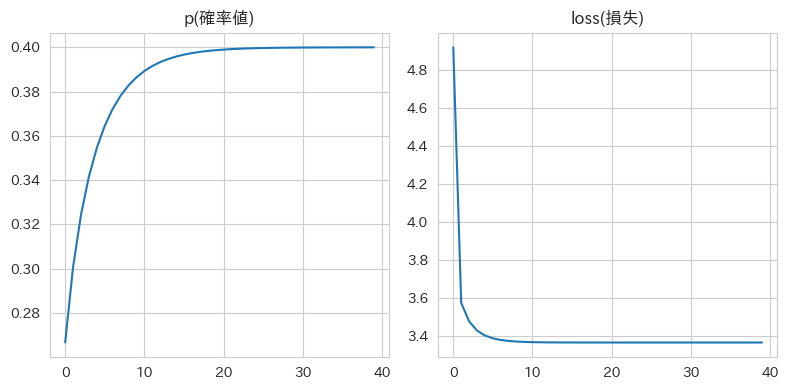

In [6]:
# 繰り返し計算の仮定を Graph表示
plt.rcParams['figure.figsize'] = (8, 4)
fig, axes = plt.subplots(1, 2)
axes[0].plot(logs[:, 0], logs[:, 1])
axes[0].set_title('p(確率値)')
axes[1].plot(logs[:, 0], logs[:, 2])
axes[1].set_title('loss(損失)')
plt.tight_layout()
plt.show()

0.40 の確率値が繰り返し計算で導出されている。